**Load the dataset**

In [29]:
import pandas as pd


training_data_path = 'twitter_training.csv'
data = pd.read_csv(training_data_path)
print(data.head())
print(data.columns)


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


# **Assign the names to coulmns and check NaN values**

In [30]:
column_names = [ 'id', 'topic', 'sentiment', 'text']
data = pd.read_csv('twitter_training.csv',names = column_names)
data.drop('id',axis = 1,inplace=True)

In [31]:
data['text'].fillna('', inplace=True)

In [32]:
import nltk

# Download the stopwords corpus
nltk.download('stopwords')

# Download other necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Preprocess the dataset**

In [33]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


text_column = 'text'  # Replace with the actual column name

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W+', ' ', text)
    text = text.lower()
    return text

#cleaning function
data['cleaned_text'] = data[text_column].apply(clean_text)

# Tokenize and remove stop words
stop_words = set(stopwords.words('english'))
data['tokens'] = data['cleaned_text'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
data['lemmatized_tokens'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

print(data.head())


         topic sentiment                                               text  \
0  Borderlands  Positive  im getting on borderlands and i will murder yo...   
1  Borderlands  Positive  I am coming to the borders and I will kill you...   
2  Borderlands  Positive  im getting on borderlands and i will kill you ...   
3  Borderlands  Positive  im coming on borderlands and i will murder you...   
4  Borderlands  Positive  im getting on borderlands 2 and i will murder ...   

                                        cleaned_text  \
0  im getting on borderlands and i will murder yo...   
1  i am coming to the borders and i will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands and i will murder yo...   

                               tokens                  lemmatized_tokens  
0  [im, getting, borderlands, murder]  [im, getting, borderland, murder]  
1             [coming, borders, kill] 

# **Perform Sentiment Analysis**

In [34]:
from textblob import TextBlob


def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment function if not already labeled
#if 'sentiment' not in data.columns:
#    data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

print(data['sentiment'].value_counts())


sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


# **Visualize the analysis**

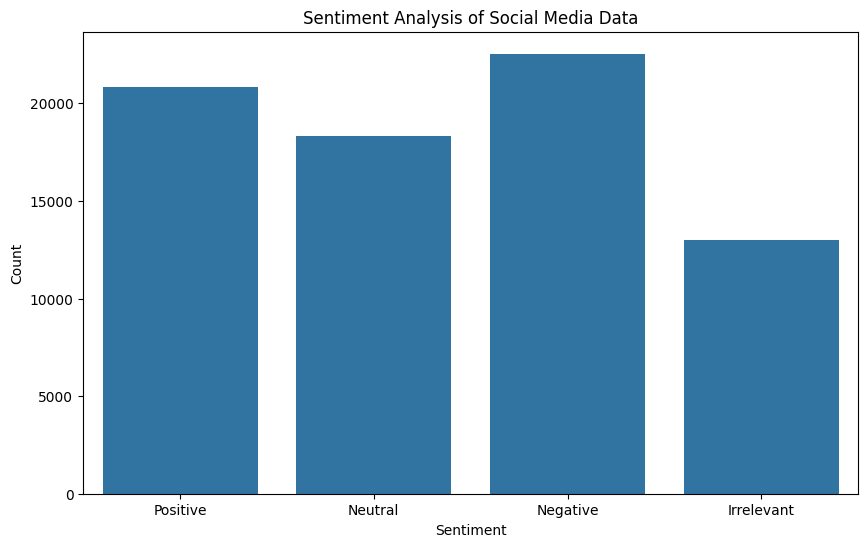

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Analysis of Social Media Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

